## Naive Bayes Classifier - Text Classification - Gaussian

In this notebook we will learn how to apply the Naive Bayes algorithms for text classification. We will use a corpora of emails and classify them in one of the two classes: spam and non-spam (ham)

Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes’ theorem with the “naive” assumption of conditional independence between every pair of features given the value of the class variable.


We will investigate three different naive Bayes classifiers. These classifiers differ mainly by the assumptions they make regarding the distribution of the likelihhod of the features $p(x_j \mid y = c)$.

- Categorical features (binary valued) are modeled using the Multivariate Bernoulli distribution 
- Categorical features (multi-valued) are modeled using the Multinomial distribution 
- Real-valued features are modeled using the Gaussian distribution 

In this notebook we will implement the <strong> Gaussian NB </strong> classifier.



### Dataset

URL: https://archive.ics.uci.edu/ml/datasets/spambase



##### Attribute Information:

The last column of 'spambase.data' denotes whether the e-mail was considered spam (1) or not (0), i.e., unsolicited commercial e-mail. Most of the attributes indicate whether a particular word or character was frequently occuring in the e-mail. The run-length attributes (55-57) measure the length of sequences of consecutive capital letters. Here are the definitions of the attributes: 

- 48 continuous real [0,100] attributes of type word_freq_WORD = percentage of words in the e-mail that match WORD, i.e. 100 * (number of times the WORD appears in the e-mail) / total number of words in e-mail. A "word" in this case is any string of alphanumeric characters bounded by non-alphanumeric characters or end-of-string. 

- 6 continuous real [0,100] attributes of type char_freq_CHAR] = percentage of characters in the e-mail that match CHAR, i.e. 100 * (number of CHAR occurences) / total characters in e-mail 

- 1 continuous real [1,...] attribute of type capital_run_length_average = average length of uninterrupted sequences of capital letters 

- 1 continuous integer [1,...] attribute of type capital_run_length_longest = length of longest uninterrupted sequence of capital letters 

- 1 continuous integer [1,...] attribute of type capital_run_length_total = sum of length of uninterrupted sequences of capital letters = total number of capital letters in the e-mail 

- 1 nominal {0,1} class attribute of type spam = denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. 




## Steps for Classification:

Note that the email data has already been preprocessd and features are extracted as vectors. Since the features are real-valued, we will use the Gaussian NB model.

1. Exploratory Data Analysis
2. Train the Gaussian NB Model
3. Analyzing Model Performance
4. Evaluate the Model on Test Data

In [15]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns


from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, precision_recall_curve, classification_report
from sklearn.naive_bayes import GaussianNB

# Load Data

Load data from the CSV file as Pandas DataFrame object.

In [2]:
df = pd.read_csv('/Users/hasan/datasets/spambase.csv')

# <font color=blue> 1. Exploratory Data Analysis</font>

## Quick Check of the Data

Let’s take a look at the top five rows using the DataFrame’s head() method.

In [3]:
df.head()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 58 columns):
0         4600 non-null float64
0.64      4600 non-null float64
0.64.1    4600 non-null float64
0.1       4600 non-null float64
0.32      4600 non-null float64
0.2       4600 non-null float64
0.3       4600 non-null float64
0.4       4600 non-null float64
0.5       4600 non-null float64
0.6       4600 non-null float64
0.7       4600 non-null float64
0.64.2    4600 non-null float64
0.8       4600 non-null float64
0.9       4600 non-null float64
0.10      4600 non-null float64
0.32.1    4600 non-null float64
0.11      4600 non-null float64
1.29      4600 non-null float64
1.93      4600 non-null float64
0.12      4600 non-null float64
0.96      4600 non-null float64
0.13      4600 non-null float64
0.14      4600 non-null float64
0.15      4600 non-null float64
0.16      4600 non-null float64
0.17      4600 non-null float64
0.18      4600 non-null float64
0.19      4600 non-null float

In [5]:
print("Dimension of the data: ", df.shape)

no_of_rows = df.shape[0]
no_of_columns = df.shape[1]

print("No. of Rows: %d" % no_of_rows)
print("No. of Columns: %d" % no_of_columns)

Dimension of the data:  (4600, 58)
No. of Rows: 4600
No. of Columns: 58


## Class Distribution

In [6]:
label_counts = df.iloc[:,-1].value_counts()
print(label_counts)

0    2788
1    1812
Name: 1, dtype: int64


## Visualization of the Class Distribution

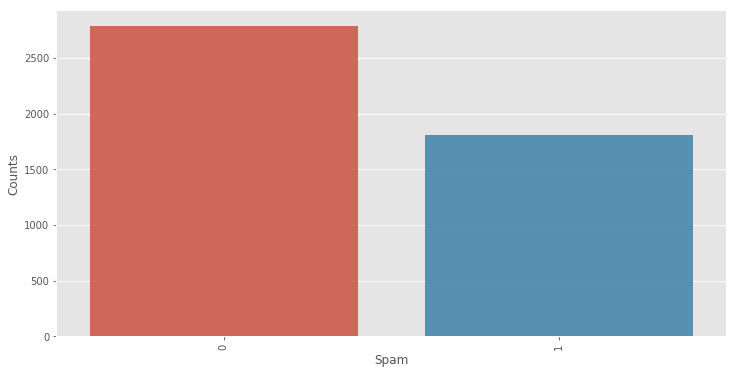

In [7]:
label_counts = df.iloc[:,-1].value_counts()
plt.figure(figsize = (12,6))
sns.barplot(label_counts.index, label_counts.values, alpha = 0.9)

plt.xticks(rotation = 'vertical')
plt.xlabel('Spam', fontsize =12)
plt.ylabel('Counts', fontsize = 12)
plt.show()

## Create a Separate Feature Set (Data Matrix X) and Target (1D Vector y)

Create a data matrix (X) that contains all features and a 1D target vector (y) containing the target.

In [8]:
X = df.iloc[:,0:-1]

y = df.iloc[:,-1] # 1D targer vector

print(X.shape)
print(y.shape)

(4600, 57)
(4600,)


## Create Train and Test Dataset

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# <font color=blue> 2. Train The Gaussian NB Model </font>

In [10]:
gaussianNB_clf = GaussianNB().fit(X_train, y_train)

# <font color=blue> 3. Analyzing Model Performance </font>

## Evaluate the Model using the ROC Curve for Train Data

The Receiver Operating Characteris (ROC) is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied.

The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings. 

We will use sklearn.metrics.roc_curve() function to generate the ROC curve.

It will take at least two arguments:
- True binary labels
- Target scores

Note that the target scores can either be probability estimates of the positive class, confidence values, or non-thresholded measure of decisions (as returned by “decision_function” on some classifiers).



### Target Score for NB Classifier

For the NB classifier, we use the probability estimates of the spam emails as the target score.

There are two ways to obtain the probability estimates of the spam class.
- The NB model's predict_proba() function.
- The model_selection.cross_val_predict() function in which need to use the attribute "method" with the value "predict_proba" as: method="predict_proba"

Note that both of the functions will return a n X 2 matrix (n = no. of data). The second column of this matrix stores the probability of the spam class.

Thus, we need to retrieve the values from the 2nd column of the returned matrix to get the probability estimates of the spam class (target score values).

In [11]:
# Get the 2nd column of the matrix of predicted probabilities for each data point
#    The 2nd column stores the probalities of the spam class
y_scores = cross_val_predict(gaussianNB_clf, X_train, y_train, method="predict_proba", cv=5)[:, 1]

fpr, tpr, thresholds = roc_curve(y_train, y_scores)

# print("\nFPR FPR & TPR for Various Threshold Values:")

# print("FPR: ", fpr)
# print("TPR: ", tpr)
# print("\nThresholds: ", thresholds)

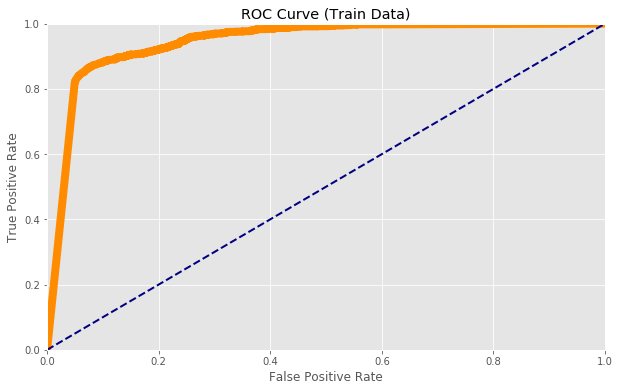

In [12]:
fig = plt.figure(figsize=(10, 6))
def plot_roc_curve(fpr, tpr, label=None): 
    plt.plot(fpr, tpr, color='darkorange', linewidth=8, label=label) 
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.axis([0, 1, 0, 1])
    plt.title('ROC Curve (Train Data)')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(fpr, tpr)
plt.show()

In [16]:
# Area under ROC curve
roc_auc_score(y_train,y_scores)

0.9445905105024299

# Precision-Recall Curve

We can plot precision and recall as functions of the threshold values.

Then, we can select the threshold value that gives the best precision/recall tradeoff for our problem. 

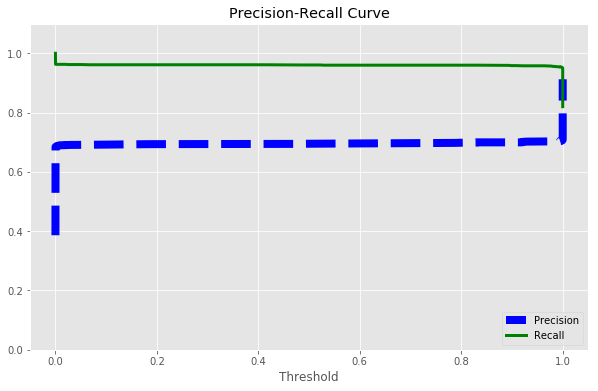

In [17]:
# Get the 2nd column of the matrix of predicted probabilities for each data point
#    The 2nd column stores the probalities of the spam class
#y_scores = cross_val_predict(gaussianNB_clf, X_train, y_train, method="predict_proba", cv=5)[:, 1]

precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)


fig = plt.figure(figsize=(10, 6))
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds): 
    plt.plot(thresholds, precisions[:-1], "b--",  linewidth=8, label="Precision") 
    plt.plot(thresholds, recalls[:-1], "g-",  linewidth=3, label="Recall") 
    plt.xlabel("Threshold")
    plt.legend(loc="lower right")
    plt.title('Precision-Recall Curve')
    #plt.xlim([0, 1])
    plt.ylim([0, 1.1])

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

# <font color=blue> 4. Evaluate the Model on Test Data </font>

In [18]:
y_test_predicted = gaussianNB_clf.predict(X_test)


print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, y_test_predicted))

precision_test = precision_score(y_test, y_test_predicted) 
print("\nTest Precision = %f" % precision_test)

recall_test = recall_score(y_test, y_test_predicted)
print("Test Recall = %f" % recall_test)


f1_test = f1_score(y_test, y_test_predicted)
print("Test F1 Score = %f" % f1_test)

print("\nClassification Report:")
print(classification_report(y_test, y_test_predicted, target_names = ["Not Spam", "Spam"]))


Test Confusion Matrix:
[[380 150]
 [ 20 370]]

Test Precision = 0.711538
Test Recall = 0.948718
Test F1 Score = 0.813187

Classification Report:
              precision    recall  f1-score   support

    Not Spam       0.95      0.72      0.82       530
        Spam       0.71      0.95      0.81       390

   micro avg       0.82      0.82      0.82       920
   macro avg       0.83      0.83      0.82       920
weighted avg       0.85      0.82      0.82       920



## <font color=maroon> Observation on Gaussian Model </font>

We observe that the recall for non-spam and precision for spam is small.